----------------
----------------

# Ejemplos de Cadenas de Cadenas de Markov

----------------
----------------

## Ejemplo 1: Evolución del vector de estado



Supongamos que tenemos un modelo simplificado del clima que consta de tres estados: soleado (S), nublado (N) y lluvioso (L). La probabilidad de que el clima cambie de un día a otro depende únicamente del clima actual.

<br>

 **Definición del Proceso**

- El estado $X_t$ representa el clima en el día $t$.

- Los posibles estados son $S$ (soleado), $N$ (nublado) y $L$ (lluvioso).



<br>

**Probabilidades de Transición**

Supongamos que tenemos los siguientes datos históricos:

- Si hoy es soleado, hay una probabilidad del 50\% de que mañana también sea soleado, y un 20\% de que sea lluvioso.

- Si hoy es nublado, hay una probabilidad del 20\% de que mañana sea soleado, un 60\% de que siga siendo nublado y un 20\% de que sea lluvioso.

- Si hoy es lluvioso, hay una probabilidad del 10\% de que mañana sea soleado y un 40\% de que sea nublado.


<br>

**Pregunta**

Con la anteriro informacion determine:

 1. Asumiendo un modelo de cadena de markov para describir este proceso estocastico, encuentre la matriz de transición de este proceso.

 2. Suponiendo que inicialmente se observa un dia soleado, determine cual es el clima mas probable (Soleado, Nublado o lloviendo) dentro de quince dias.



**Solución**

1. Suponiendo que el vector de estado es (Soleado, Nublado, Lluvioso), la  matriz de transición $P$ seria:

$$
 P = \begin{pmatrix}
0.5 & x & 0.2 \\
0.2 & 0.6 & 0.2 \\
0.1 & 0.4 & y \\
\end{pmatrix}
$$

Donde $x$ es la probabilidad de que si hoy es soleado, mañana estara nublado. Por la propiedad las filas de la matriz de transicion,

$$ x= 1- (0.5 + 0.2) = 0.3 $$


De manera analoga obtenemos que

$$ y= 1- (0.1 + 0.4) = 0.5 $$

<br>


Por lo tanto, la matriz de transición para el proceso de Markov es:

$$
 P = \begin{pmatrix}
0.5 & 0.3 & 0.2 \\
0.2 & 0.6 & 0.2 \\
0.1 & 0.4 & 0.5 \\
\end{pmatrix}
$$

<br>

<br>

2.
Si supongamos que hoy es soleado, el vector de estado inicial lo podemos representar  como un vector fila dado por

$$
v = (1 ,0 ,0)
$$

Para determinar cual es el estado mas probable, solo tenemos que evolucionar el vector de estado como sigue:

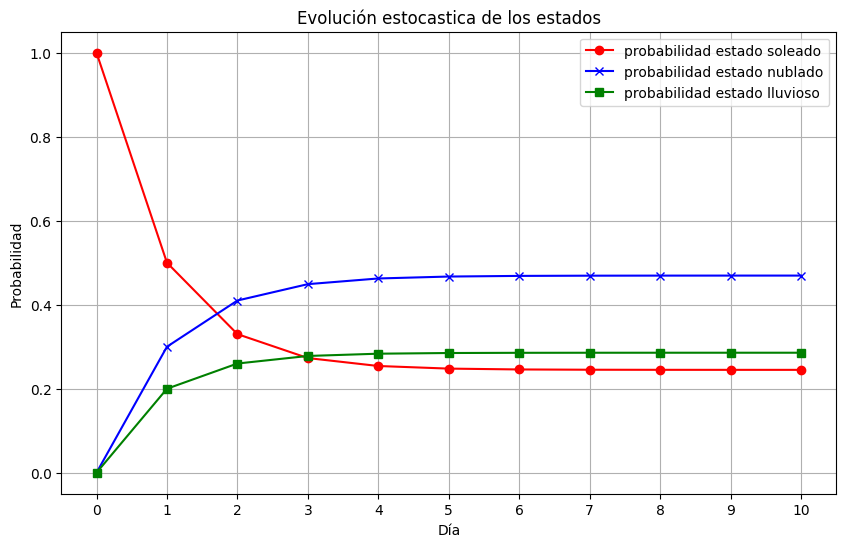

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la matriz de transición para el clima
P = np.array([[0.5, 0.3, 0.2],
              [0.2, 0.6, 0.2],
              [0.1, 0.4, 0.5]])

# Vector de estado inicial para el día 0 (soleado, nublado, lluvioso)
v_0 = np.array([1.0, 0.0, 0.0])


#Definicion de listas para guardar los estados
evolucion1 = [v_0[0]]  # Probabilidad  de dia soleado
evolucion2 = [v_0[1]]  # Probabilidad  de dia nublado
evolucion3 = [v_0[2]]  # Probabilidad  de dia lluvioso


# Función para calcular la evolución de la primera componente del vector de estado
def evolucion_vector_estado(dias):

    v_n = v_0
    for _ in range(dias):

        #Se actualiza el vector de estado
        v_n = np.dot( v_n ,  P  )

        #guardamos las componentes en las listas
        evolucion1.append(v_n[0])
        evolucion2.append(v_n[1])
        evolucion3.append(v_n[2])



# Calcular la evolución de la primera componente del vector de estado para los primeros 30 días
dias = 10
evolucion = evolucion_vector_estado(dias)

# Crear el gráfico de evolución
plt.figure(figsize=(10, 6))

plt.plot(range(dias + 1), evolucion1, 'ro-' , label='probabilidad estado soleado' )

plt.plot(range(dias + 1), evolucion2, 'bx-' , label='probabilidad estado nublado' )

plt.plot(range(dias + 1), evolucion3, 'gs-' , label='probabilidad estado lluvioso')

plt.title('Evolución estocastica de los estados')
plt.xlabel('Día')
plt.legend()
plt.ylabel('Probabilidad')
plt.xticks(range(dias + 1))
plt.grid(True)
plt.show()

## Ejemplo 2 : Construccion de la matriz de transición

1. Los datos


Supongamos que tenemos datos históricos sobre el  precio de una acción de la bolsa de valores de new york durante 300 dias. En la tabla se observa el numero de veces que la accion disminuyó, aumento o se mantuvo sin cambios dado su estado anterior.


Estado actual | Estado siguiente | Frecuencia
--------------|------------------|-----------
Aumento       | Aumento          | 50
Aumento       | Sin Cambios      | 30
Aumento       | Disminución      | 20
Sin Cambios   | Aumento          | 40
Sin Cambios   | Sin Cambios      | 40
Sin Cambios   | Disminución      | 20
Disminución   | Aumento          | 20
Disminución   | Sin Cambios      | 10
Disminución   | Disminución      | 70


<br>


Construya un modelo de estocastico de Markov, en el cual pueda decidir sobre si compar o no una accion dentro de un mes, si inicialmente la accion esta *aumentando*.





**Solución**


1. Construcción de la Matriz de Transición


- Los datos como un diccionario:

In [ ]:
import numpy as np

import pandas as pd #usaremos pandas y dat frames :)!


# Datos de transiciones (Tipo diccionario)
transiciones = {
    ('Aumento', 'Aumento'): 50,
    ('Aumento', 'Sin Cambios'): 30,
    ('Aumento', 'Disminución'): 20,
    ('Sin Cambios', 'Aumento'): 40,
    ('Sin Cambios', 'Sin Cambios'): 40,
    ('Sin Cambios', 'Disminución'): 20,
    ('Disminución', 'Aumento'): 20,
    ('Disminución', 'Sin Cambios'): 10,
    ('Disminución', 'Disminución'): 70,
}


#Para ver los items del diccionario
print(transiciones.items())
input()


#para ver solo las claves del diccionario
print(transiciones.keys())
input()

#Para ver solo un item  del diccionario
print(transiciones[('Aumento', 'Aumento')] )
input()




dict_items([(('Aumento', 'Aumento'), 50), (('Aumento', 'Sin Cambios'), 30), (('Aumento', 'Disminución'), 20), (('Sin Cambios', 'Aumento'), 40), (('Sin Cambios', 'Sin Cambios'), 40), (('Sin Cambios', 'Disminución'), 20), (('Disminución', 'Aumento'), 20), (('Disminución', 'Sin Cambios'), 10), (('Disminución', 'Disminución'), 70)])

dict_keys([('Aumento', 'Aumento'), ('Aumento', 'Sin Cambios'), ('Aumento', 'Disminución'), ('Sin Cambios', 'Aumento'), ('Sin Cambios', 'Sin Cambios'), ('Sin Cambios', 'Disminución'), ('Disminución', 'Aumento'), ('Disminución', 'Sin Cambios'), ('Disminución', 'Disminución')])

50



''

 - Armando el data-frame (datos estructurados!) que sera la matriz de transición.

In [ ]:

# Estados
estados = ['Aumento', 'Sin Cambios', 'Disminución']


#Crear matriz de conteo de transiciones
matriz_transicion = pd.DataFrame(0, index=estados, columns=estados)


#Veamos la estructura de los datos
print(matriz_transicion)


             Aumento  Sin Cambios  Disminución
Aumento            0            0            0
Sin Cambios        0            0            0
Disminución        0            0            0


- Llenar la matriz de transicion de los datos

- hacemos lo mismo pero con los datos que estan en el diccionario

In [ ]:

#Haciendo un for simultaneo sobre un diccionario para llenar la matriz!
for (estado_actual, estado_siguiente), frecuencia in transiciones.items():
    matriz_transicion.loc[estado_actual, estado_siguiente] = frecuencia


print(matriz_transicion)

             Aumento  Sin Cambios  Disminución
Aumento           50           30           20
Sin Cambios       40           40           20
Disminución       20           10           70


- **PASO MUY IMPORTANTE:**


Para encontrar la matriz de transición, debemos normalizar TODAS las filas. Es decir, debemos de dividir cada fila por el numero de transancciones que se realizaron por fila.

<br>
Este paso viene de la propiedad de la matriz de transicion:

$$1 = \sum^{n}_{j} p_{ij},$$

para toda fila $i$.

In [ ]:
 # Esto lo podemos hacer sumando el primer eje del data frame (el eje horizontal!)

print( matriz_transicion.sum(axis=1) )



Aumento        100.0
Sin Cambios    100.0
Disminución    100.0
dtype: float64


In [ ]:
#por lo tanto tenemos

matriz_transicion = matriz_transicion /  matriz_transicion.sum(axis=1)



# Mostrar la matriz de transición
print("Matriz de Transición:")
print(matriz_transicion)

Matriz de Transición:
             Aumento  Sin Cambios  Disminución
Aumento          0.5          0.3          0.2
Sin Cambios      0.4          0.4          0.2
Disminución      0.2          0.1          0.7


In [ ]:
matriz_transicion

,Aumento,Sin Cambios,Disminución
Aumento,0.5,0.3,0.2
Sin Cambios,0.4,0.4,0.2
Disminución,0.2,0.1,0.7


2. Vizualizacion de datos

Suponiendo que inicialmente una accion estaba bajando, nos da un vector de estado $v = ( \text{aumento} , \text{sin cambios} , \text{disminución} )$ con valores de

$$v = ( 1 , 0 , 0 )$$

Por lo tanto, podemos aplicar la evolucion del vector de estado para ver que sucede dentro de 30 dias!



In [ ]:
#vector de estado inicial
v_0 = np.array([1.0, 0.0, 0.0  ])


#vector de estado generico
v_n = v_0

#Evolucion del vector de estado
for _ in range(30):
    v_n = v_n @  matriz_transicion

print("El vector de estado despues de 30 dias es :" )
print(v_n)



El vector de estado despues de 30 dias es :
Aumento        0.355556
Sin Cambios    0.244444
Disminución    0.400000
dtype: float64


Veamos la evolucion del vector de estado si inicialmente la acción esta subiendo en el primer dia:

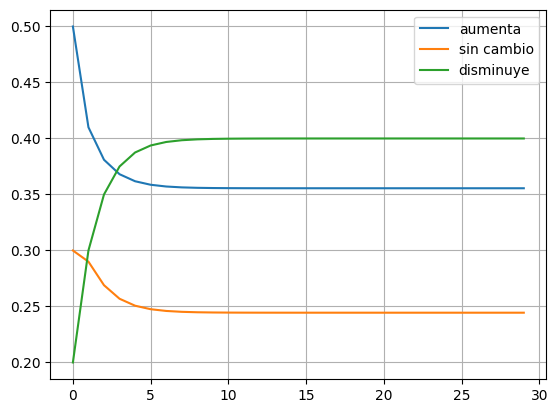

In [ ]:
#vector de estado inicial
v_0 = np.array([1.0, 0.0, 0.0  ])


#vector de estado generico
v_n = v_0

#listas para guardar la info
Aumentar =[]
SinCambio=[]
Disminuir=[]


#Evolucion del vector de estado
for _ in range(30):
    v_n = v_n @  matriz_transicion

    Aumentar.append(v_n[0])
    SinCambio.append(v_n[1])
    Disminuir.append(v_n[2])

plt.plot(range(30),Aumentar , label='aumenta')
plt.plot(range(30),SinCambio, label='sin cambio')
plt.plot(range(30),Disminuir, label='disminuye')
plt.grid()
plt.legend()
plt.show()
